In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten

In [3]:
# prepare independent features and dependent features
def prepare_data(timeseries_data, n_features):
    X, y = [], []
    for i in range(len(timeseries_data)):
        end_ix = i + n_features # 0->3, 1->4, 2->5, 
        if end_ix > len(timeseries_data) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [4]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]

# choose a number of time steps
n_steps = 3

# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [5]:
print(X)
print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


In [6]:
X.shape, y.shape

((6, 3), (6,))

In [7]:
# reshape from [samples, timesptes] into [samples, timesteps, features]
n_features = 1
X = X.reshape(X.shape[0], X.shape[1], n_features)

In [8]:
X.shape

(6, 3, 1)

# Building LSTM Model

In [9]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=300, verbose=0)

# Predicting for the next 10 days

In [10]:
x_input = np.array([187, 196, 210])
temp_input = list(x_input)
lst_output = []
i = 0
while(i<10):
    if (len(temp_input) > 3):
        x_input = np.array(temp_input[1:])
        # print(x_input)
        print("{} day input: {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output: {}".format(i, yhat[0][0]))
        print()
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        # print(temp_input)
        lst_output.append(yhat[0][0])
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        # print(yhat.shape)
        # print(yhat[0][0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i = i + 1
    

1 day input: [196.         210.         224.37532043]
1 day output: 235.06173706054688

2 day input: [210.         224.37532043 235.06173706]
2 day output: 248.6350555419922

3 day input: [224.37532 235.06174 248.63506]
3 day output: 262.33514404296875

4 day input: [235.06174 248.63506 262.33514]
4 day output: 274.5843505859375

5 day input: [248.63506 262.33514 274.58435]
5 day output: 288.56060791015625

6 day input: [262.33514 274.58435 288.5606 ]
6 day output: 302.642578125

7 day input: [274.58435 288.5606  302.64258]
7 day output: 316.4512939453125

8 day input: [288.5606  302.64258 316.4513 ]
8 day output: 331.3509216308594

9 day input: [302.64258 316.4513  331.35092]
9 day output: 346.4757080078125



# Visualizing the output


In [11]:
import matplotlib.pyplot as plt 

In [12]:
timeseries_data 

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [13]:
lst_output

[224.37532,
 235.06174,
 248.63506,
 262.33514,
 274.58435,
 288.5606,
 302.64258,
 316.4513,
 331.35092,
 346.4757]

In [14]:
day_new = np.arange(1, 10)
day_pred = np.arange(10, 20)

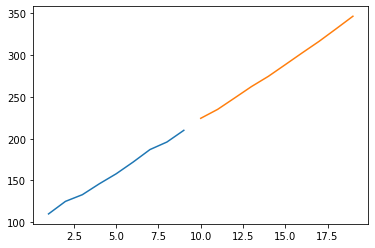

In [17]:
plt.plot(day_new, timeseries_data)
plt.plot(day_pred, lst_output)